<a href="https://colab.research.google.com/github/reginafeles/ml_hw/blob/main/task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### HW1

#### Import

In [172]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#### EDA

In [173]:
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [174]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


* survival	- Survival	- 0 = No, 1 = Yes
* pclass	- Ticket class	- 1 = 1st, 2 = 2nd, 3 = 3rd
* sex	- Sex	- male/female
* Age	- Age in years
* sibsp	- of siblings / spouses aboard the Titanic
* parch	- of parents / children aboard the Titanic
* ticket	- Ticket number
* fare	- Passenger fare
* cabin	- Cabin number
* embarked	- Port of Embarkation	- C = Cherbourg, Q = Queenstown, S = Southampton





In [175]:
df.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0




---


Сategorical variables

In [176]:
df.select_dtypes(include=['object', 'category']).columns

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

In [177]:
for column in df.columns:
  print(column, len(df[column].unique()))

PassengerId 891
Survived 2
Pclass 3
Name 891
Sex 2
Age 89
SibSp 7
Parch 7
Ticket 681
Fare 248
Cabin 148
Embarked 4




---


```Name``` ```Ticket``` ```Cabin``` - many unique values, no point in converting to a number - let's drop it


```Sex``` - male/female - convert in 0 and 1
```Embarked``` - leave, 4 values convert into numbers

**Вывод**
```PassengerId``` ```Name``` ```Ticket``` ```Cabin``` - not needed, drop;
```Age``` ```Embarked```- fill;
```Sex``` - encode








---







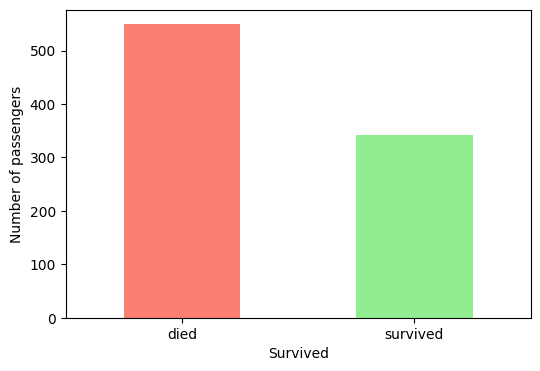

In [178]:
plt.figure(figsize=(6, 4))
df['Survived'].value_counts().plot(kind='bar', color=['salmon', 'lightgreen'])
plt.xlabel('Survived')
plt.ylabel('Number of passengers')
plt.xticks([0, 1], ['died', 'survived'], rotation=0)
plt.show()

imbalanced

In [179]:
df = df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'])
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


**Categorical --> Numerical**

In [180]:
df['Sex'] = LabelEncoder().fit_transform(df['Sex'])
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,S
1,1,1,0,38.0,1,0,71.2833,C
2,1,3,0,26.0,0,0,7.9250,S
3,1,1,0,35.0,1,0,53.1000,S
4,0,3,1,35.0,0,0,8.0500,S


In [181]:
embarked_dummies = pd.get_dummies(df['Embarked'], prefix='Embarked')
df = pd.concat([df, embarked_dummies], axis=1)
df['Embarked'] = df['Embarked'].fillna('S')
df = df.drop('Embarked', axis=1)

df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,22.0,1,0,7.2500,False,False,True
1,1,1,0,38.0,1,0,71.2833,True,False,False
2,1,3,0,26.0,0,0,7.9250,False,False,True
3,1,1,0,35.0,1,0,53.1000,False,False,True
4,0,3,1,35.0,0,0,8.0500,False,False,True


I like numbers, so I'll take a useless but comfortable step for me - converting True and Files into 1 and 0

In [182]:
df['Embarked_C'] = LabelEncoder().fit_transform(df['Embarked_C'])
df['Embarked_Q'] = LabelEncoder().fit_transform(df['Embarked_Q'])
df['Embarked_S'] = LabelEncoder().fit_transform(df['Embarked_S'])
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,22.0,1,0,7.2500,0,0,1
1,1,1,0,38.0,1,0,71.2833,1,0,0
2,1,3,0,26.0,0,0,7.9250,0,0,1
3,1,1,0,35.0,1,0,53.1000,0,0,1
4,0,3,1,35.0,0,0,8.0500,0,0,1


Actually, I dont like the idea using ```SimpleImputer``` because it just takes the mean of values, so I decided to make more reasonable step

In [183]:
age_1 = df[df['Pclass'] == 1]['Age'].median()
age_2 = df[df['Pclass'] == 2]['Age'].median()
age_3 = df[df['Pclass'] == 3]['Age'].median()
age_1, age_2, age_3

(37.0, 29.0, 24.0)

In [184]:
def fill_age(row):
   if pd.isnull(row['Age']):
       if row['Pclass'] == 1:
           return age_1
       if row['Pclass'] == 2:
           return age_2
       return age_3
   return row['Age']

In [185]:
df['Age'] = df.apply(fill_age, axis = 1)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,22.0,1,0,7.2500,0,0,1
1,1,1,0,38.0,1,0,71.2833,1,0,0
2,1,3,0,26.0,0,0,7.9250,0,0,1
3,1,1,0,35.0,1,0,53.1000,0,0,1
4,0,3,1,35.0,0,0,8.0500,0,0,1


In [186]:
df['Age'] = df['Age'].astype(int)

I decided to rely on ```Pclass``` and take the median age of each class and replace the empty values ​​accordingly

In [187]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
df['IsAlone'] = (df['FamilySize'] == 1).astype(int)

df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,FamilySize,IsAlone
0,0,3,1,22,1,0,7.2500,0,0,1,2,0
1,1,1,0,38,1,0,71.2833,1,0,0,2,0
2,1,3,0,26,0,0,7.9250,0,0,1,1,1
3,1,1,0,35,1,0,53.1000,0,0,1,2,0
4,0,3,1,35,0,0,8.0500,0,0,1,1,1


Then I looked at ```Fare``` and thought what if ```Fare``` does not depend on  on ```Pclass```

so lets try

Ticket price limits by class

In [188]:
max_fare = df['Fare'].max()
min_fare = df['Fare'].min()
med_fare = df['Fare'].median()
max_fare, min_fare, med_fare

(512.3292, 0.0, 14.4542)

numbers of people of different classes

In [189]:
print(df[df['Pclass'] == 1].shape[0])
print(df[df['Pclass'] == 2].shape[0])
print(df[df['Pclass'] == 3].shape[0])

216
184
491


top and bottom limits

In [190]:
print(df[df['Fare'] >= 175].shape[0])
print(df[(df['Fare'] >= 14) & (df['Fare'] <= 175)].shape[0])
print(df[df['Fare'] < 14].shape[0])

20
435
436


unfair limits, so lets check

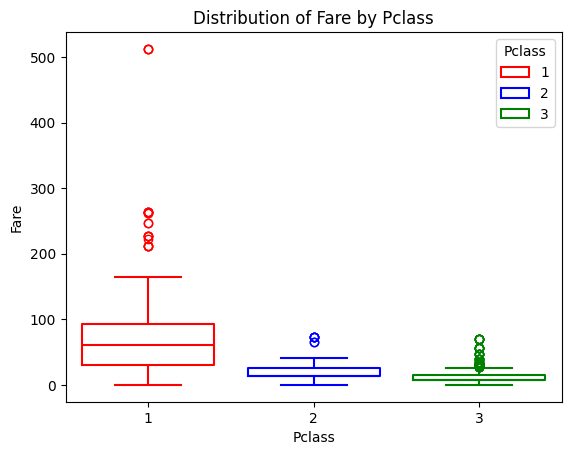

In [211]:
sns.boxplot(x='Pclass', y='Fare', data=df, hue='Pclass', fill=False, palette={1: "red", 2: "blue", 3: "green"})
plt.title('Distribution of Fare by Pclass')
plt.xlabel('Pclass')
plt.ylabel('Fare')
plt.show()

According to the boxplot: lots of outliers for the rich and little difference in price for the poor and middle class

So:
* rich -> from 50 and higher
* middle -> from 25 to 50
* cheap -> from 0 to 25


In [192]:
print(df[df['Fare'] >= 50].shape[0])
print(df[(df['Fare'] >= 25) & (df['Fare'] < 50)].shape[0])
print(df[df['Fare'] < 25].shape[0])

161
173
557


Looks like the truth

New Feature: ```FClass``` - Ticket Price


*   0 - cheap
*   1 - middle
*   2 - high







In [193]:
df['FareCategory'] = pd.cut(df['Fare'], bins=[0, 25, 50, float('inf')], labels=[0, 1, 2], right=False)
df.head(20)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,FamilySize,IsAlone,FareCategory
0,0,3,1,22,1,0,7.2500,0,0,1,2,0,0
1,1,1,0,38,1,0,71.2833,1,0,0,2,0,2
2,1,3,0,26,0,0,7.9250,0,0,1,1,1,0
3,1,1,0,35,1,0,53.1000,0,0,1,2,0,2
4,0,3,1,35,0,0,8.0500,0,0,1,1,1,0
5,0,3,1,24,0,0,8.4583,0,1,0,1,1,0
6,0,1,1,54,0,0,51.8625,0,0,1,1,1,2
7,0,3,1,2,3,1,21.0750,0,0,1,5,0,0
8,1,3,0,27,0,2,11.1333,0,0,1,3,0,0
9,1,2,0,14,1,0,30.0708,1,0,0,2,0,1


In [194]:
df['FareCategory'] = df['FareCategory'].astype(int)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,FamilySize,IsAlone,FareCategory
0,0,3,1,22,1,0,7.2500,0,0,1,2,0,0
1,1,1,0,38,1,0,71.2833,1,0,0,2,0,2
2,1,3,0,26,0,0,7.9250,0,0,1,1,1,0
3,1,1,0,35,1,0,53.1000,0,0,1,2,0,2
4,0,3,1,35,0,0,8.0500,0,0,1,1,1,0




---


Add binary feature ```IsMajor``` for age


*   0 - child (to 18)
*   1 - adult


In [195]:
df['IsMajor'] = df['Age'].apply(lambda x: 1 if x >= 18 else 0)
df.head(20)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,FamilySize,IsAlone,FareCategory,IsMajor
0,0,3,1,22,1,0,7.2500,0,0,1,2,0,0,1
1,1,1,0,38,1,0,71.2833,1,0,0,2,0,2,1
2,1,3,0,26,0,0,7.9250,0,0,1,1,1,0,1
3,1,1,0,35,1,0,53.1000,0,0,1,2,0,2,1
4,0,3,1,35,0,0,8.0500,0,0,1,1,1,0,1
5,0,3,1,24,0,0,8.4583,0,1,0,1,1,0,1
6,0,1,1,54,0,0,51.8625,0,0,1,1,1,2,1
7,0,3,1,2,3,1,21.0750,0,0,1,5,0,0,0
8,1,3,0,27,0,2,11.1333,0,0,1,3,0,0,1
9,1,2,0,14,1,0,30.0708,1,0,0,2,0,1,0


Lets see the feature correlation

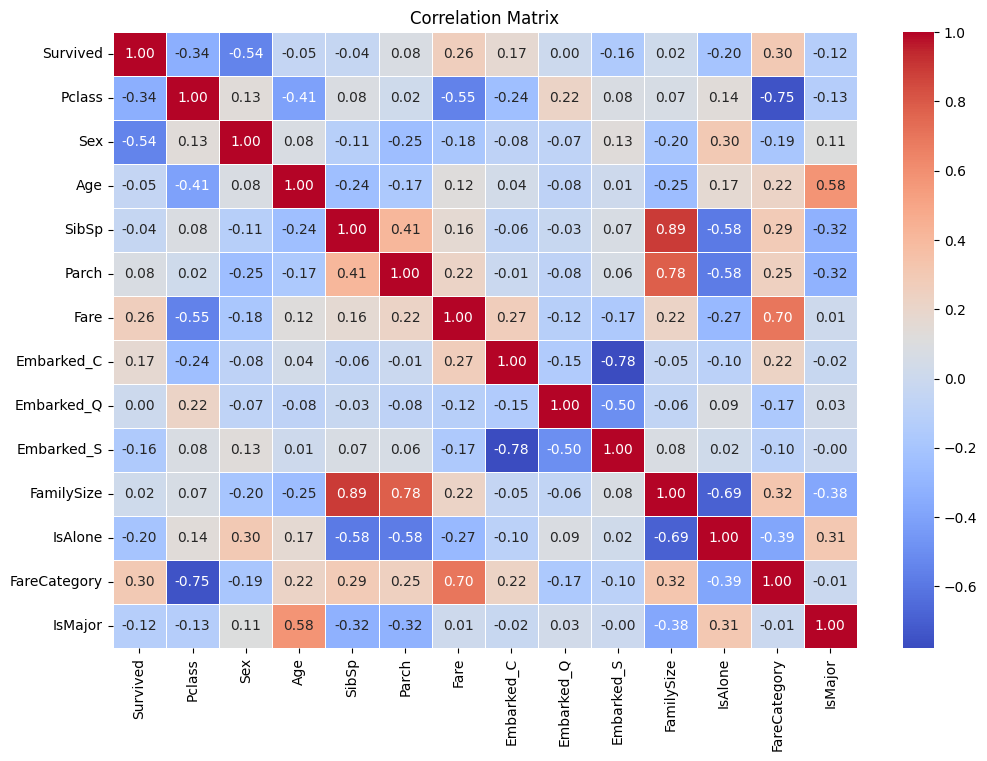

Sex            -0.543351
Pclass         -0.338481
IsAlone        -0.203367
Embarked_S     -0.155660
IsMajor        -0.122239
Age            -0.047266
SibSp          -0.035322
Embarked_Q      0.003650
FamilySize      0.016639
Parch           0.081629
Embarked_C      0.168240
Fare            0.257307
FareCategory    0.298856
Name: Survived, dtype: float64


In [196]:
corr_matrix = df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()
corr_with_target = df.corr()["Survived"].drop("Survived")
print(corr_with_target.sort_values())

```Sex``` has the strongest correlation with ```Survived```

Lets see the distribution between them

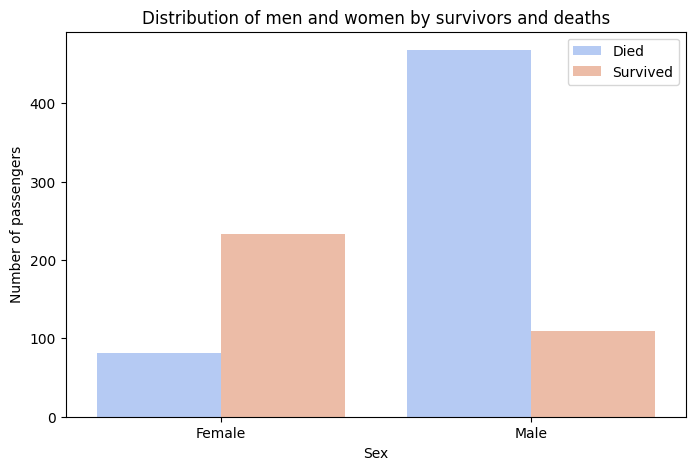

In [200]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x="Sex", hue="Survived", palette="coolwarm")

plt.title("Distribution of men and women by survivors and deaths")
plt.xlabel("Sex")
plt.ylabel("Number of passengers")
plt.xticks(ticks=[0, 1], labels=["Female", "Male"])
plt.legend(labels=["Died", "Survived"])

plt.show()

```Embarked_Q``` has the lowest correlation, so we can drop it

In [212]:
df = df.drop(columns=['Embarked_Q'])
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_S,FamilySize,IsAlone,FareCategory,IsMajor
0,0,3,1,22,1,0,7.2500,0,1,2,0,0,1
1,1,1,0,38,1,0,71.2833,1,0,2,0,2,1
2,1,3,0,26,0,0,7.9250,0,1,1,1,0,1
3,1,1,0,35,1,0,53.1000,0,1,2,0,2,1
4,0,3,1,35,0,0,8.0500,0,1,1,1,0,1


#### Training

In [213]:
X = df.drop(columns=['Survived'])
y = df['Survived']

In [214]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



---


Logistic regression is used for classification, through linear combibantion calculates the probability of object belonging to a class. During training, the parameters of the model are optimized to minimize the prediction error. It is important for the model to standardize the data, that is, to bring it to one scale, since features with different scales can affect the results. ```StandardScaler``` improves the stability of calculations. For our data, this is especially useful, since there are features with different units of measurement

In [215]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [216]:
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)

y_pred_log = log_reg.predict(X_test_scaled)

print("Logistic Regression Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))

Logistic Regression Performance:
Accuracy: 0.8100558659217877
              precision    recall  f1-score   support

           0       0.82      0.87      0.84       105
           1       0.79      0.73      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179





---



```GaussianNB``` uses a Bayesian classifier that assumes that for each class, the features are distributed according to a Gaussian law. This simplifies the problem, since the model estimates the parameters of the normal distribution for each feature in each class.

```StandardScaler``` is not needed because the algorithm itself assumes that each feature has a normal distribution, and does not depend on the scale of the data.

In [217]:
nb = GaussianNB()
nb.fit(X_train, y_train)

y_pred_nb = nb.predict(X_test)

print("Naïve Bayes Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))

Naïve Bayes Performance:
Accuracy: 0.770949720670391
              precision    recall  f1-score   support

           0       0.82      0.78      0.80       105
           1       0.71      0.76      0.73        74

    accuracy                           0.77       179
   macro avg       0.76      0.77      0.77       179
weighted avg       0.77      0.77      0.77       179





---



KNN (K-Nearest Neighbors) is based on the principle of finding the nearest neighbors: K nearest neighbors are selected and the object is classified based on the classes of these neighbors. The algorithm works by calculating the distances between objects

KNN is sensitive to different feature scales, since the distances between points are calculated for each feature.

In [218]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train_scaled, y_train)


y_pred_knn = knn.predict(X_test_scaled)
print("KNN Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

KNN Performance:
Accuracy: 0.8044692737430168
              precision    recall  f1-score   support

           0       0.84      0.83      0.83       105
           1       0.76      0.77      0.77        74

    accuracy                           0.80       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.80      0.80      0.80       179



Class balance affects algorithms. In ```KNN```, this happens because the nearest neighbors may be predominantly in the dominant class, making the classification for the minority less accurate. ```GaussianNB``` can also err by favoring the class with more objects, since the probability estimate is based on the frequency of classes in the data. ```Logistic regression``` can predict the dominant class with high probability, since the log loss focuses on the overall class rather than the minority.



---
XGBoost is a gradient boosting algorithm that builds a sequence of models, decision trees, to improve prediction accuracy. Each new tree tries to correct the errors of the previous one based on the gradient of the error function. The model uses regularization to prevent overfitting. XGBoost is about speeding up training and using computing resources efficiently (sounds like an ad). The final prediction is obtained by combining all the trees, making the model more accurate and robust.



Ensure that all features used in training are also present in the test

In [219]:
common_columns = X_train.columns.intersection(X_test.columns)

In [220]:
X_train_xgb = X_train[common_columns]
X_test_xgs = X_test[common_columns]

DMatrix is ​​a special data type to speed up training in XGBoost.

In [221]:
dmtrain = xgb.DMatrix(X_train_xgb, label=y_train, enable_categorical=True)
dmtest = xgb.DMatrix(X_test_xgs, label=y_test, enable_categorical=True)

balance the weights of the classes

In [222]:
scale_pos_weight = sum(y_train == 0) / sum(y_train == 1)

parameters for the XGBoost model

* ```"objective": "binary:logistic``` - the task is binary classification with logistic regression
* ```eval_metric": "logloss``` - metric for model evaluation
* ```scale_pos_weight``` - parameter for class balancing
* ```max_depth``` - maximum tree depth
* ```eta``` - pace of learning
* ```subsample``` - the proportion of random data that will be used to train each tree
* ```"seed": 42``` - random state



In [223]:
params = {
    "objective": "binary:logistic",
    "eval_metric": "logloss",
    'scale_pos_weight': scale_pos_weight,
    "max_depth": 7,
    "eta": 0.01,
    "subsample": 0.7,
    "seed": 42
}

specifies the data set for evaluating the model

In [224]:
evals = [(dmtrain, 'train'), (dmtest, 'test')]

train and predict

In [225]:
mxgb = xgb.train(params, dmtrain, num_boost_round=500, evals=evals, early_stopping_rounds=50)

y_pred_prob = mxgb.predict(dmtest)
y_pred_xbg= (y_pred_prob > 0.5).astype(int)

[0]	train-logloss:0.68830	test-logloss:0.68916
[1]	train-logloss:0.68344	test-logloss:0.68498
[2]	train-logloss:0.67824	test-logloss:0.68048
[3]	train-logloss:0.67348	test-logloss:0.67624
[4]	train-logloss:0.66874	test-logloss:0.67181
[5]	train-logloss:0.66393	test-logloss:0.66772
[6]	train-logloss:0.65948	test-logloss:0.66378
[7]	train-logloss:0.65501	test-logloss:0.65974
[8]	train-logloss:0.65075	test-logloss:0.65589
[9]	train-logloss:0.64646	test-logloss:0.65187
[10]	train-logloss:0.64214	test-logloss:0.64828
[11]	train-logloss:0.63794	test-logloss:0.64447
[12]	train-logloss:0.63403	test-logloss:0.64105
[13]	train-logloss:0.63000	test-logloss:0.63744
[14]	train-logloss:0.62605	test-logloss:0.63391
[15]	train-logloss:0.62191	test-logloss:0.63047
[16]	train-logloss:0.61797	test-logloss:0.62715
[17]	train-logloss:0.61434	test-logloss:0.62380
[18]	train-logloss:0.61073	test-logloss:0.62029
[19]	train-logloss:0.60721	test-logloss:0.61705
[20]	train-logloss:0.60368	test-logloss:0.61373
[2

In [226]:
print("XGBoost Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_xbg))
print(classification_report(y_test, y_pred_xbg))

XGBoost Performance:
Accuracy: 0.8324022346368715
              precision    recall  f1-score   support

           0       0.85      0.87      0.86       105
           1       0.81      0.78      0.79        74

    accuracy                           0.83       179
   macro avg       0.83      0.83      0.83       179
weighted avg       0.83      0.83      0.83       179



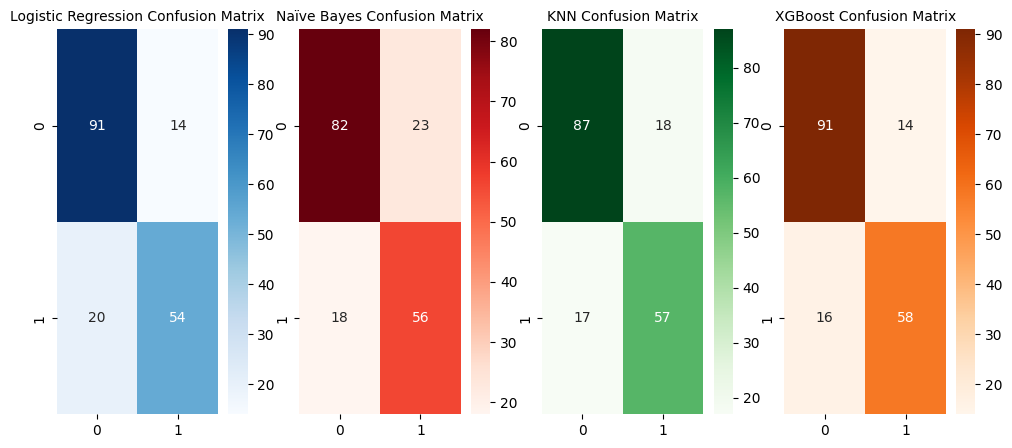

In [227]:
conf_matrix_log = confusion_matrix(y_test, y_pred_log)
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
conf_matrix_xbg = confusion_matrix(y_test, y_pred_xbg)

fig, axes = plt.subplots(1, 4, figsize=(12, 5))

sns.heatmap(conf_matrix_log, annot=True, fmt="d", cmap="Blues", ax=axes[0])
axes[0].set_title("Logistic Regression Confusion Matrix", fontsize=10)

sns.heatmap(conf_matrix_nb, annot=True, fmt="d", cmap="Reds", ax=axes[1])
axes[1].set_title("Naïve Bayes Confusion Matrix", fontsize=10)

sns.heatmap(conf_matrix_knn, annot=True, fmt="d", cmap="Greens", ax=axes[2])
axes[2].set_title("KNN Confusion Matrix", fontsize=10)
sns.heatmap(conf_matrix_xbg, annot=True, fmt="d", cmap="Oranges", ax=axes[3])
axes[3].set_title("XGBoost Confusion Matrix", fontsize=10)

plt.show()

As we can see, XGBoost shows the best result, due to the balanced classes, its regularization algorithms, and parameter optimization

Logistic regression is not as sensitive to imbalance as KNN and GaussianNB, which reflects the worst result